<a href="https://colab.research.google.com/github/Rithick-ramesh/Cyber-security-project1/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files
uploaded = files.upload()

Saving nsl_kdd_dataset (1).csv to nsl_kdd_dataset (1).csv


In [4]:
df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())


   duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0  0.666287       0.577740  0.248644  0.039280   0.151331   0.441503   
1  0.143014       0.729235  0.539983  0.485997   0.055436   0.291892   
2  0.401813       0.101389  0.961499  0.367041   0.133935   0.567280   
3  0.887278       0.168009  0.660708  0.656651   0.614879   0.400250   
4  0.360109       0.274258  0.064115  0.353499   0.531030   0.539846   

       land  wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0  0.996257        0.739421  0.042406  0.244036  ...            0.223672   
1  0.143944        0.858332  0.304242  0.901082  ...            0.610218   
2  0.080431        0.875795  0.603445  0.235740  ...            0.077247   
3  0.853977        0.907267  0.469452  0.998242  ...            0.054651   
4  0.001381        0.897988  0.350272  0.597418  ...            0.118315   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                0.336817                0.546493   
1   

In [11]:
X = df.drop("label", axis=1)
y = df["label"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [19]:
non_numeric_cols_train = X_train.select_dtypes(include=['object']).columns
non_numeric_cols_test = X_test.select_dtypes(include=['object']).columns

X_train_numeric = X_train.drop(columns=non_numeric_cols_train)
X_test_numeric = X_test.drop(columns=non_numeric_cols_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [20]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


In [14]:

def predict_fraud(input_list):
    scaled = scaler.transform([input_list])
    pred = model.predict(scaled)[0]
    return "FRAUD" if pred == 1 else "NOT FRAUD"
    print("\nEnter transaction details to predict:")

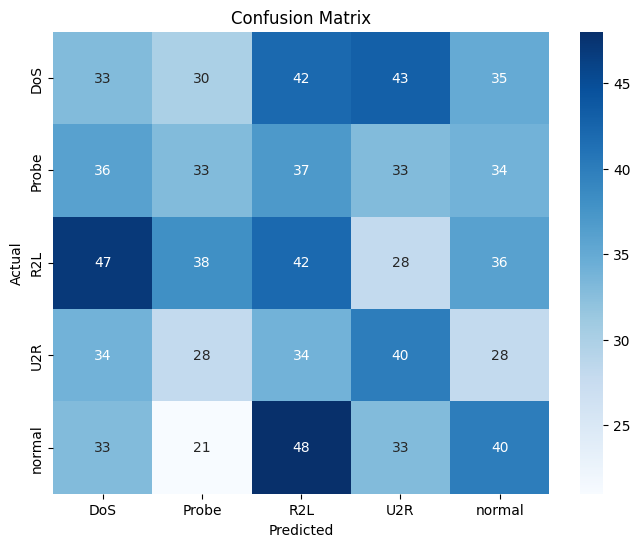

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()